In [161]:
import pandas as pd
import numpy as np

#### Aufgabe 2

In [162]:
df = pd.read_stata(r"K:\Stat_Workshop\Python\Daten\GEDA2014-2015\geda14.dta")

#### Aufgabe 3

In [163]:
df.shape

(12008, 269)

In [164]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12008 entries, 0 to 12007
Data columns (total 269 columns):
 #    Column              Dtype   
---   ------              -----   
 0    sex                 category
 1    sexb                category
 2    age5B               category
 3    age10B              category
 4    agegrp1             category
 5    agegrp2             category
 6    agegrp4             category
 7    agegrp6             category
 8    agegrp7             category
 9    agegrp8             category
 10   agegrp9             category
 11   agegrp10            category
 12   agegrp11            category
 13   agegrp12            category
 14   untm                int8    
 15   untj                int16   
 16   ppoint              int32   
 17   ktyp4               category
 18   bula                category
 19   bula2               category
 20   wob                 category
 21   reg5                category
 22   reg5b               category
 23   reg4     

#### Aufgabe 4

Die Frageformulierung findet sich auf Seite 1 im Fragebogen:<br>
"*Wie ist Ihr Gesundheitszustand im Allgemeinen?*"

#### Aufgabe 5

Der Variablen-/Spaltenname zu dieser Frage lautet *SHseh1*.

#### Aufgabe 6

In [165]:
df['sex'].value_counts(sort = False) # die Option 'sort = False' verhindert, dass die Ausprägungen nach Häufigkeit sortiert werden

Männlich    5452
Weiblich    6556
Name: sex, dtype: int64

In [166]:
df['sex'].value_counts(sort = False, normalize = True)

Männlich    0.454031
Weiblich    0.545969
Name: sex, dtype: float64

#### Aufgabe 7

In [167]:
df['KHdiabB12'].value_counts(sort = False, normalize = True)

Ja      0.07472
Nein    0.92528
Name: KHdiabB12, dtype: float64

#### Aufgabe 8

Der Modus (häufigster Wert) ist "*Verheiratet oder eingetragene Lebenspartnerschaft*".

<AxesSubplot:>

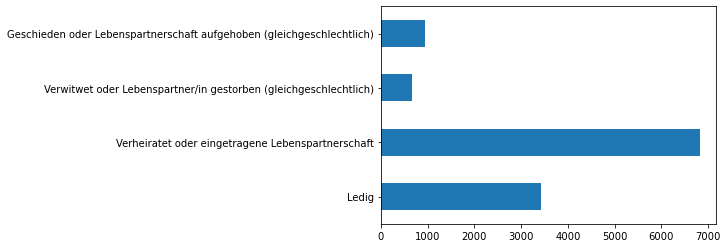

In [168]:
df['PAfam1C'].value_counts(sort = False).plot.barh()

#### Aufgabe 9

Modus < Median < arithmetisches Mittel &rarr; linkssteile/rechtsschiefe Verteilung

In [169]:
df['SDses_score'].mode()

0    9.6
dtype: float64

In [170]:
df['SDses_score'].median()

12.100000381469727

In [171]:
df['SDses_score'].mean()

12.497537609790522

#### Aufgabe 10

#### Kleiner Aufräum-Exkurs

Die Variable *LQzufrB10* erfasst die Lebenszufriedenheit der Befragten mit 11 verschiedenen Merkmalsausprägungen von 0 ("*Überhaupt nicht zufrieden*") bis 10 ("*Vollkommen zufrieden*"). Die meisten würden diese Variable aus quasi-metrisch ansehen. *pandas* hat sie aber als kategoriale Variable eingelesen: 

Die folgenden beiden Codezeilen wandeln diese Variable in eine numerische, ganzzahlige Variable um und stellen die fehlenden Werte wieder her:

In [172]:
df['LQzufrB10'] = df['LQzufrB10'].cat.codes
df['LQzufrB10'] = df['LQzufrB10'].replace(-1, np.NaN).astype('Int64')

In [173]:
df.groupby('GZmehm3C')['LQzufrB10'].mean()

GZmehm3C
Ja      7.152405
Nein    7.838103
Name: LQzufrB10, dtype: Float64

In [174]:
df.groupby('GZmehm3C')['LQzufrB10'].std()

GZmehm3C
Ja      2.015528
Nein    1.589281
Name: LQzufrB10, dtype: float64

<AxesSubplot:>

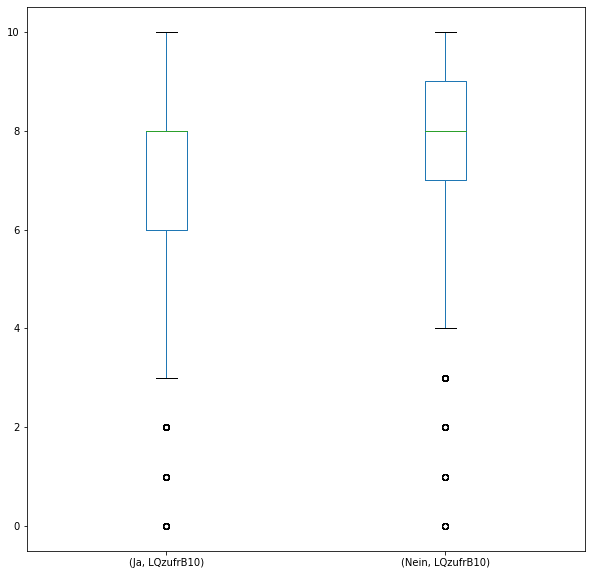

In [175]:
df.groupby('GZmehm3C').boxplot(column = ['LQzufrB10'], grid = False, subplots=False, figsize = (10,10))